In [2]:
#import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1.0,0.1],[0.1,1.1]])

mean_02 = np.array([2.0, 2.0])
cov_02 = np.array([[1.2, 0.2],[0.2, 1.5]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


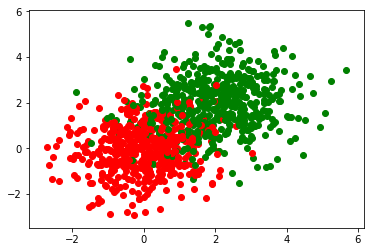

In [74]:
for ix in range(dist_01.shape[0]):
    plt.scatter(dist_01[ix, 0], dist_01[ix, 1], c='r')
    plt.scatter(dist_02[ix, 0], dist_02[ix, 1], c = 'g')
plt.show()

In [75]:
rows = dist_01.shape[0]+dist_02.shape[0]
cols = dist_01.shape[1]+1

data = np.zeros((rows, cols))
print(data.shape)

(1000, 3)


In [76]:
data[:dist_01.shape[0], :-1] = dist_01
data[dist_01.shape[0]:dist_01.shape[0]+dist_02.shape[0],:-1] = dist_02

data[dist_01.shape[0]:dist_01.shape[0]+dist_02.shape[0],-1] = 1.0

In [77]:
np.random.shuffle(data)
print(data[:10])

[[ 1.21098436  2.05573387  1.        ]
 [-0.01821571  0.25275514  0.        ]
 [ 3.35294023  1.66178285  1.        ]
 [ 0.64272106 -0.18321059  0.        ]
 [ 1.9761143   1.6862254   1.        ]
 [-1.92456713 -0.31526501  0.        ]
 [ 0.14502337 -1.80626836  0.        ]
 [ 1.81039709  2.97965529  1.        ]
 [ 3.65011585  2.92719066  1.        ]
 [ 3.1540841   1.59195687  1.        ]]


In [78]:
split_factor = 0.85
split = int(data.shape[0]*split_factor)
train_data = data[:split]
test_data = data[split:]

X_train = train_data[:,:-1]
Y_train = train_data[:,-1]

X_test = test_data[:,:-1]
Y_test = test_data[:,-1]
print(X_train.shape)
print(Y_test.shape)

(850, 2)
(150,)


In [79]:
from sklearn.svm import SVC
import time

In [80]:
clf = SVC(gamma='auto')
start_t = time.time()
clf.fit(X_train, Y_train)
print(clf.score(X_test, Y_test))
end_t = time.time()
print(end_t-start_t)

0.8333333333333334
0.011385679244995117


In [83]:
class Pegasos():
    def __init__(self, n_iter = 100 , lambda_ = 1):
        self.n_iter = n_iter
        self.lambda_ = lambda_
        
    def fit(self, X, Y):
        #Y_ = list()
        for i in range(Y.shape[0]):
            if Y[i]==0:
                Y[i]=-1
            else:
                Y[i]=1
        m, n_features = X.shape[0], X.shape[1]
        self.w = np.zeros(n_features)
        for i in range(self.n_iter):
            eta = 1./(self.lambda_*(i+1))
            j = np.random.choice(m, 1)[0]
            x, y = X[j], Y[j]
            score = self.w.dot(x)
            if y*score<1:
                self.w = (1- eta*self.lambda_)*self.w + eta*y*x
            else:
                self.w = (1-eta*self.lambda_)*self.w
        avg = 0.0
        for i in range(50):
            j = np.random.choice(m, 1)[0]
            x , y = X[j], Y[j]
            temp = self.w.dot(x)
            avg+=y - temp
        avg/=50
        self.b = avg
    def predict(self, x_point):
        temp = self.w.dot(x_point)+self.b
        if temp>=0:
            return 1
        else:
            return -1
    def accuracy_score(self, X_test, Y_test):
        #Y = list()
        for i in range(Y_test.shape[0]):
            if Y_test[i]==0:
                Y_test[i]=-1
            else:
                Y_test[i]=1
        res = 0.0
        for ix in range(X_test.shape[0]):
            temp = self.predict(X_test[ix])
            if temp==Y_test[i]:
                res+=1
        res /= X_test.shape[0]
        return res

In [84]:
clf_1 = Pegasos()
st = time.time()
clf_1.fit(X_train, Y_train)
print(clf_1.accuracy_score(X_test, Y_test))
et = time.time()
print(et-st)

0.8866666666666667
0.009210824966430664
